In [1]:
!pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 5.0 MB/s eta 0:00:00


In [3]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

stock1 = 'ORCL' # 오라클
stock2 = 'CRM' # 세일즈 포스
stock3 = 'PLTR' # 팔란티
stock4 = 'ONON' # 온홀딩

s1 = fdr.DataReader(stock1, '2021')[['Close']].rename(columns = {'Close' : stock1})
s2 = fdr.DataReader(stock2, '2021')[['Close']].rename(columns = {'Close' : stock2})
s3 = fdr.DataReader(stock3, '2021')[['Close']].rename(columns = {'Close' : stock3})
s4 = fdr.DataReader(stock4, '2021')[['Close']].rename(columns = {'Close' : stock4})

stocks = pd.concat([s1, s2, s3, s4], axis = 1)
stocks

,ORCL,CRM,PLTR,ONON
2021-01-04,63.750000,220.309998,23.370001,NaN
2021-01-05,62.959999,221.520004,24.600000,NaN
2021-01-06,62.570000,216.149994,23.540001,NaN
2021-01-07,63.070000,217.979996,25.000000,NaN
2021-01-08,63.380001,222.039993,25.200001,NaN
...,...,...,...,...
2024-11-12,189.580002,341.149994,59.849998,52.619999
2024-11-13,189.630005,341.720001,60.700001,52.709999
2024-11-14,187.050003,331.649994,59.180000,53.349998
2024-11-15,183.740005,325.260010,65.769997,51.919998


<Axes: >

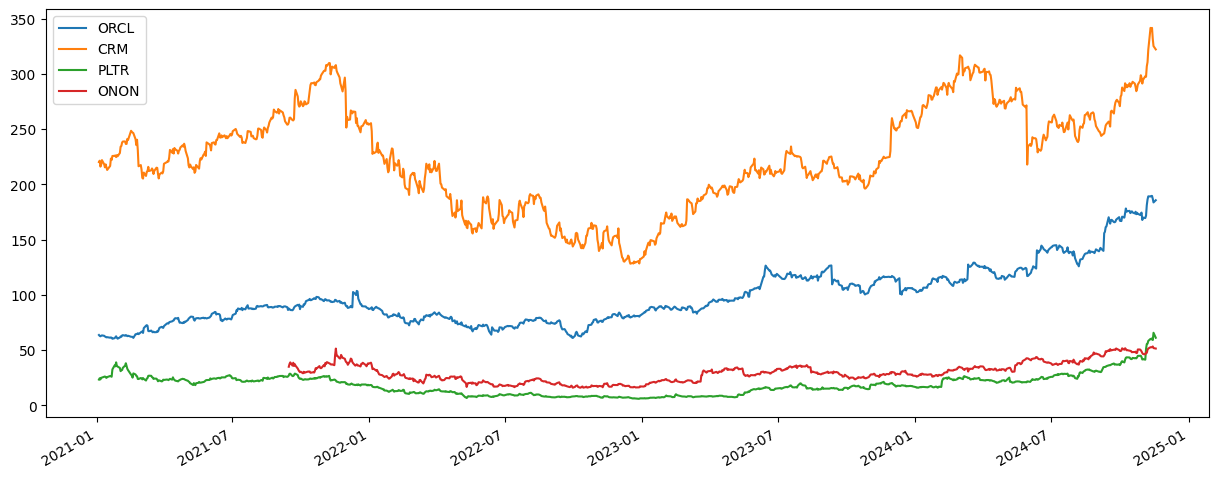

In [4]:
stocks.plot(figsize = (15, 6))

In [9]:
print('------최고점 날짜------')
print(stocks.idxmax(axis = 0))
print('-----최고 가격------')
print(stocks.max(axis = 0))
print('------최저점 날짜------')
print(stocks.idxmin(axis = 0))
print('-----최저 가격------')
print(stocks.min(axis = 0))

------최고점 날짜------
ORCL   2024-11-13
CRM    2024-11-11
PLTR   2024-11-15
ONON   2024-11-14
dtype: datetime64[ns]
-----최고 가격------
ORCL    189.630005
CRM     341.730011
PLTR     65.769997
ONON     53.349998
dtype: float64
------최저점 날짜------
ORCL   2021-01-22
CRM    2022-12-16
PLTR   2022-12-27
ONON   2022-10-10
dtype: datetime64[ns]
-----최저 가격------
ORCL     60.360001
CRM     128.270004
PLTR      6.000000
ONON     16.000000
dtype: float64


### 지수화

<Axes: >

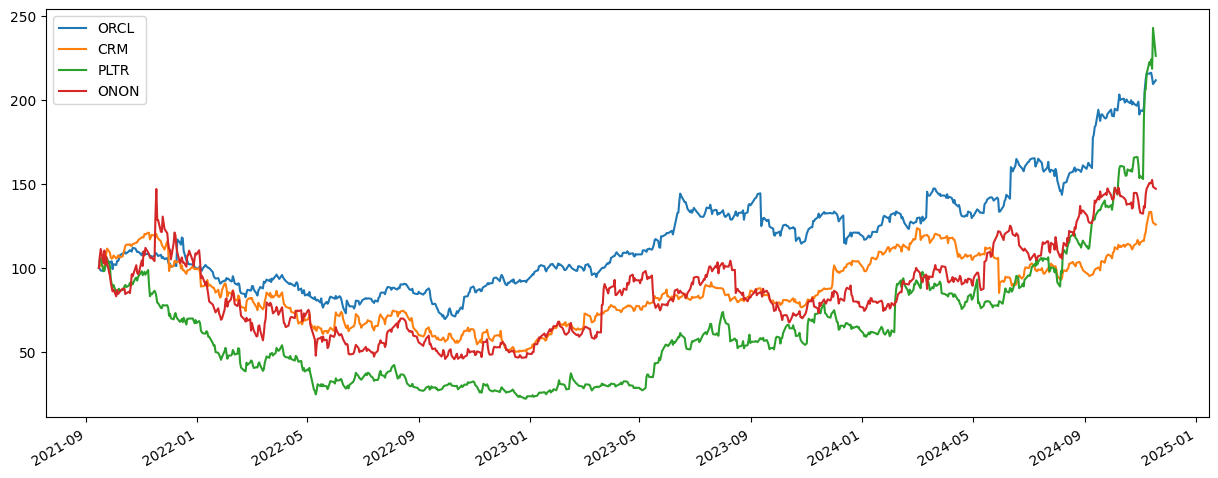

In [15]:
stocks = stocks.dropna()
norm = (stocks / stocks.iloc[0]) * 100
norm.plot(figsize = (15, 6))

### 수익률 분포

<Axes: ylabel='Frequency'>

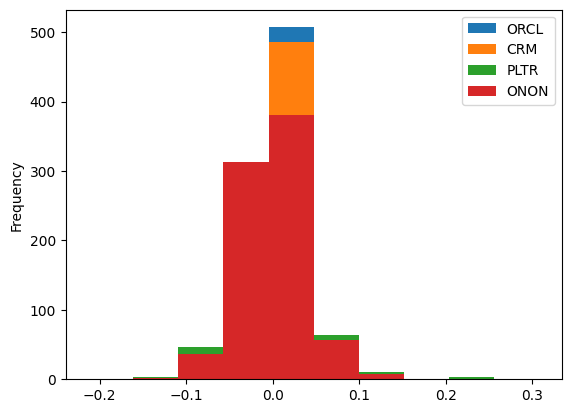

In [18]:
# 수익률 분포
pct = stocks.pct_change()
pct.plot.hist()

### 월별 수익률 비교

In [24]:
monthly_return_rate = stocks.resample('M').last().pct_change().dropna() * 100
monthly_return_rate.head()

<ipython-input-24-bcc0ecaba741>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_return_rate = stocks.resample('M').last().pct_change().dropna() * 100


,ORCL,CRM,PLTR,ONON
2021-10-31,10.111334,10.497014,7.653903,13.375376
2021-11-30,-5.420059,-4.915083,-20.208654,17.564403
2021-12-31,-3.890235,-10.819058,-11.815983,-5.851590
2022-01-31,-6.937273,-8.460237,-24.711693,-30.256546
2022-02-28,-6.394778,-9.500067,-13.566737,-7.660221


In [25]:
# 한번 plotly에서 검색해서 search 해보기
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name=stock1, x=monthly_return_rate.index, y=monthly_return_rate[stock1]),
    go.Bar(name=stock2, x=monthly_return_rate.index, y=monthly_return_rate[stock2]),
    go.Bar(name=stock3, x=monthly_return_rate.index, y=monthly_return_rate[stock3]),
    go.Bar(name=stock4, x=monthly_return_rate.index, y=monthly_return_rate[stock4])
])
# Change the bar mode
fig.show()

### 연간 수익률, 리스크 계산

In [27]:
return_rate = stocks.pct_change().dropna()
return_rate.head()

,ORCL,CRM,PLTR,ONON
2021-09-16,-0.005471,0.016396,0.057238,0.071143
2021-09-17,-0.009857,0.000653,0.002794,0.038944
2021-09-20,-0.002547,-0.008867,-0.075235,-0.075481
2021-09-21,0.008704,-0.000968,0.002637,0.073035
2021-09-22,0.017487,0.004652,0.030428,-0.074793


In [46]:
일평균수익률 = return_rate.mean()
일분산 = return_rate.var()
일표준편차 = return_rate.std() # np.sqrt(일분산)

연평균수익률 = 일평균수익률 * 252
연분산 = 일분산 * 252
연표준편차 = np.sqrt(연분산)

In [50]:
return_risk = pd.concat([연평균수익률, 연표준편차], axis = 1)
return_risk.columns = ['Return', 'Risk']
return_risk

,Return,Risk
ORCL,0.286359,0.316825
CRM,0.145334,0.379997
PLTR,0.483539,0.680187
ONON,0.304187,0.609448


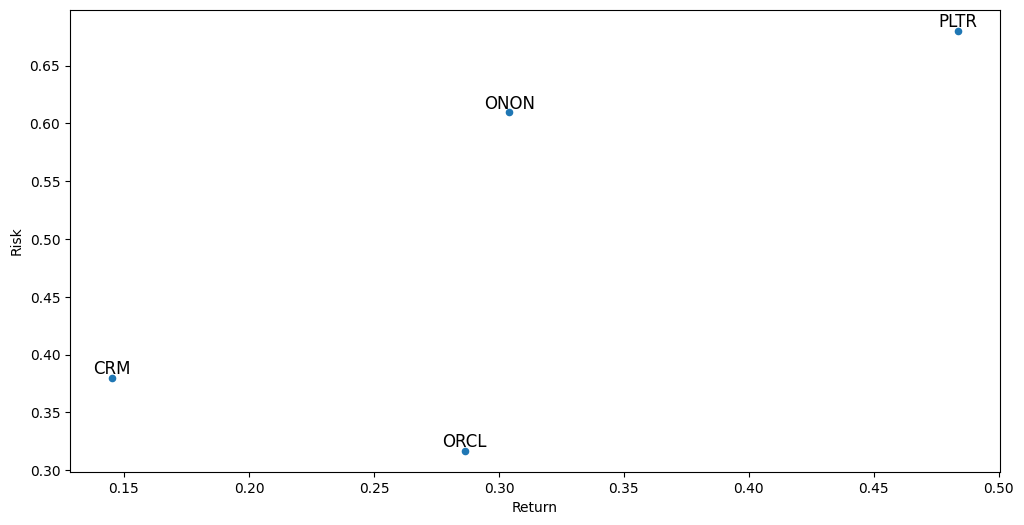

In [51]:
ax = return_risk.plot.scatter(x = 'Return', y = 'Risk', figsize = (12,6))
for idx, values in return_risk.iterrows():
  ax.annotate(idx, (values.Return,values.Risk),va="bottom", ha="center", fontsize = 12)

### 상관관계

In [54]:
return_rate.corr().style.background_gradient(cmap='Blues')

,ORCL,CRM,PLTR,ONON
ORCL,1.000000,0.385798,0.295165,0.251590
CRM,0.385798,1.000000,0.447124,0.417562
PLTR,0.295165,0.447124,1.000000,0.450090
ONON,0.251590,0.417562,0.450090,1.000000


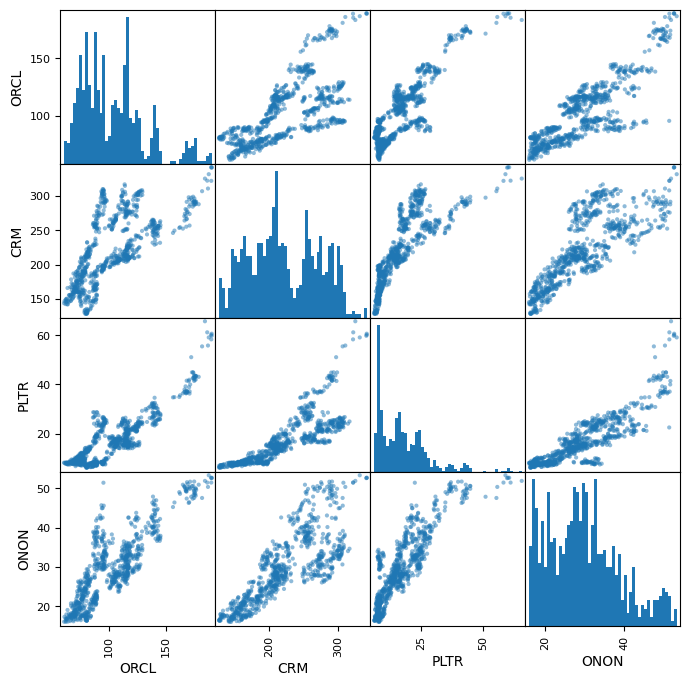

In [55]:
from pandas.plotting import scatter_matrix
scatter_matrix(stocks, figsize=(8, 8), hist_kwds={'bins': 50});

### 실습
1. 가격을 지수화 해서 라인 차트로 시각화
2. 연간 수익률, 리스크 계산 후 스케터차트로 시각화
3. 상관관계

In [67]:
gold_silver = fdr.DataReader('139320', '2019')[['Close']].rename(columns = {'Close' : 'gold'})  # TIGER 금은선물(H)
us_10yr = fdr.DataReader('305080', '2019')[['Close']].rename(columns = {'Close' : 'us10yr'})  # TIGER 미국채10년선물
sp500 = fdr.DataReader('360750', '2019')[['Close']].rename(columns = {'Close' : 'sp500'})  # TIGER 미국S&P500
nasdaq100 = fdr.DataReader('133690', '2019')[['Close']].rename(columns = {'Close' : 'nasdaq'})  # TIGER 미국나스닥100

In [70]:
stocks = pd.concat([gold_silver, us_10yr, sp500, nasdaq100], axis = 1).dropna()

<Axes: xlabel='Date'>

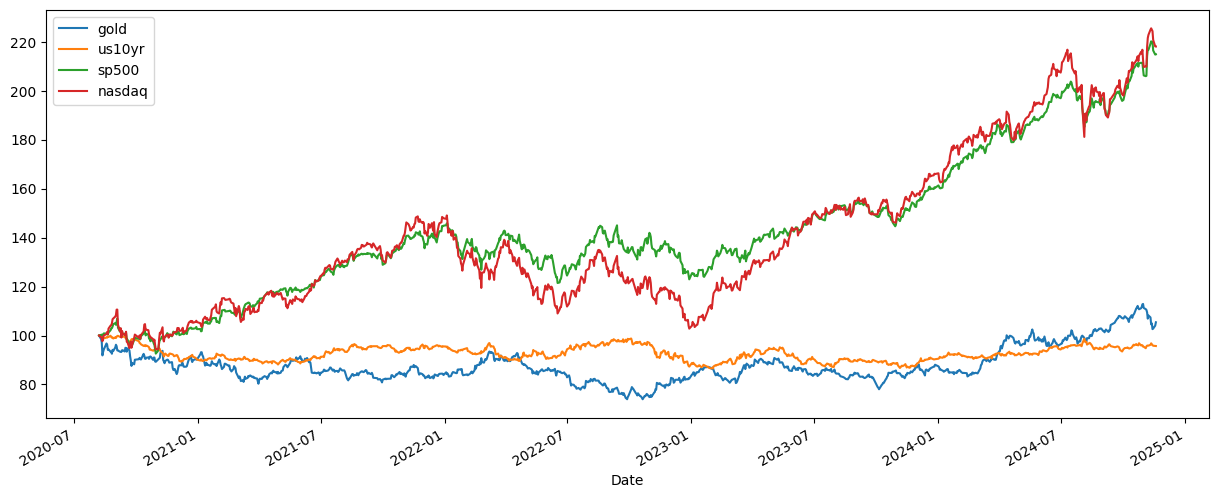

In [71]:
stocks = stocks.dropna()
norm = (stocks / stocks.iloc[0]) * 100
norm.plot(figsize = (15, 6))

In [72]:
return_rate = stocks.pct_change().dropna()
return_rate.head()

,gold,us10yr,sp500,nasdaq
Date,,,,
2020-08-10,-0.014634,-0.000786,0.002523,-0.007050
2020-08-11,-0.013051,-0.002755,0.001049,-0.000931
2020-08-12,-0.055176,-0.003157,-0.004086,-0.015386
2020-08-13,0.015444,-0.004355,0.005155,0.013612
2020-08-14,0.010456,-0.000795,0.003977,0.010301


In [73]:
일평균수익률 = return_rate.mean()
일분산 = return_rate.var()
일표준편차 = return_rate.std() # np.sqrt(일분산)

연평균수익률 = 일평균수익률 * 252
연분산 = 일분산 * 252
연표준편차 = np.sqrt(연분산)

In [74]:
return_risk = pd.concat([연평균수익률, 연표준편차], axis = 1)
return_risk.columns = ['Return', 'Risk']
return_risk

,Return,Risk
gold,0.024985,0.157158
us10yr,-0.006400,0.090535
sp500,0.194482,0.149337
nasdaq,0.208737,0.209003


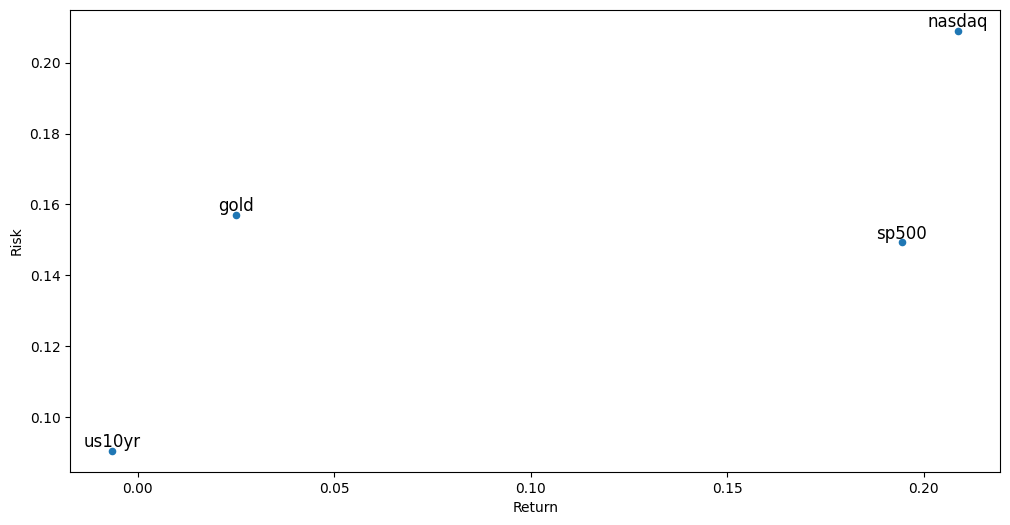

In [75]:
ax = return_risk.plot.scatter(x = 'Return', y = 'Risk', figsize = (12,6))
for idx, values in return_risk.iterrows():
  ax.annotate(idx, (values.Return,values.Risk),va="bottom", ha="center", fontsize = 12)

In [76]:
return_rate.corr().style.background_gradient(cmap='Blues')

,gold,us10yr,sp500,nasdaq
gold,1.000000,-0.078108,0.037537,0.066996
us10yr,-0.078108,1.000000,-0.000765,-0.063530
sp500,0.037537,-0.000765,1.000000,0.897784
nasdaq,0.066996,-0.063530,0.897784,1.000000
